In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
import statsmodels.api as sm
import scipy.stats as stats

In [2]:
#pip install lightgbm

In [3]:
import seaborn as sns

In [4]:
df=pd.read_csv('bodyfat.csv')

In [5]:
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [6]:
df.shape

(252, 15)

In [7]:
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [9]:
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [10]:
# warnings.filterwarnings('ignore')
# fig,ax = plt.subplots(15,3,figsize=(30,90))
# for index,i in enumerate(df.columns):
#     sns.distplot(df[i],ax=ax[index,0])
#     sns.boxplot(df[i],ax=ax[index,1])
#     stats.probplot(df[i],plot=ax[index,2])
    
# fig.tight_layout()
# fig.subplots_adjust(top=0.95)
# plt.suptitle("Visualizing Continuous Columns",fontsize=50)

In [11]:
X = df.drop(['BodyFat','Density'],axis=1)
Y = df['Density']

In [12]:
X['Bmi']=703*X['Weight']/(X['Height']*X['Height'])
X.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist,Bmi
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1,23.624460
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2,23.332048
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6,24.666315
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2,24.880784
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7,25.514854


In [13]:
X['ACratio'] = X['Abdomen']/X['Chest'] 
X['HTratio'] = X['Hip']/X['Thigh']
X.drop(['Weight','Height','Abdomen','Chest','Hip','Thigh'],axis=1,inplace=True)
X.head()

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342


In [14]:
X

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342
...,...,...,...,...,...,...,...,...,...,...
247,70,34.9,34.8,21.5,25.6,25.7,18.5,21.024226,0.937220,1.790323
248,72,40.9,40.8,23.2,35.2,28.6,20.1,29.044437,0.967742,1.753356
249,72,38.9,37.3,21.5,31.3,27.2,18.0,30.138946,1.003600,1.686567
250,72,38.9,41.6,22.7,30.5,29.4,19.8,26.979981,0.935365,1.746429


In [15]:
Y

0      1.0708
1      1.0853
2      1.0414
3      1.0751
4      1.0340
        ...  
247    1.0736
248    1.0236
249    1.0328
250    1.0399
251    1.0271
Name: Density, Length: 252, dtype: float64

In [16]:
z = np.abs(stats.zscore(X))

#only keep rows in dataframe with all z-scores less than absolute value of 3 
X_clean = X[(z<3).all(axis=1)]
Y_clean = Y[(z<3).all(axis=1)]

#find how many rows are left in the dataframe 
print(X_clean.shape)
print(Y_clean.shape)

(242, 10)
(242,)


In [17]:
X_clean

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
0,23,36.2,37.3,21.9,32.0,27.4,17.1,23.624460,0.915145,1.601695
1,22,38.5,37.3,23.4,30.5,28.9,18.2,23.332048,0.886752,1.681431
2,22,34.0,38.9,24.0,28.8,25.2,16.6,24.666315,0.917537,1.664430
3,26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860
4,24,34.4,42.2,24.0,32.2,27.7,17.7,25.514854,1.027749,1.612342
...,...,...,...,...,...,...,...,...,...,...
247,70,34.9,34.8,21.5,25.6,25.7,18.5,21.024226,0.937220,1.790323
248,72,40.9,40.8,23.2,35.2,28.6,20.1,29.044437,0.967742,1.753356
249,72,38.9,37.3,21.5,31.3,27.2,18.0,30.138946,1.003600,1.686567
250,72,38.9,41.6,22.7,30.5,29.4,19.8,26.979981,0.935365,1.746429


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_clean,Y_clean,test_size=0.2, random_state=42)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(193, 10)
(49, 10)
(193,)
(49,)


In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train.iloc[:,:]=sc.fit_transform(X_train.iloc[:, :])
X_test.iloc[:,:]=sc.fit_transform(X_test.iloc[:, :])

In [21]:
X_train

,Age,Neck,Knee,Ankle,Biceps,Forearm,Wrist,Bmi,ACratio,HTratio
121,-0.077960,0.714192,0.818858,0.166743,0.259806,0.498066,0.223978,0.064581,1.665848,1.498477
214,0.412679,-0.200091,-0.219169,-0.888387,-1.284121,-1.028590,-0.220524,-0.767511,-0.640109,-0.040167
165,-0.813919,1.149564,1.164867,1.975537,1.452841,2.656441,1.335233,0.861939,-0.705776,-1.206470
138,-0.405053,-1.549746,-0.089416,-0.360822,-0.196354,-0.660087,-0.665026,-0.609450,-0.349691,0.107337
90,0.085586,-0.287165,-0.175918,-0.360822,-1.108675,-0.502157,-0.553900,0.039736,0.982644,1.120028
...,...,...,...,...,...,...,...,...,...,...
112,0.167360,1.018952,-0.219169,0.694308,1.066859,1.287715,1.779735,0.095311,0.845750,-1.703602
15,-0.813919,-0.635464,0.040338,-0.963753,-0.406890,-1.186520,-1.442904,0.309831,0.471997,-1.878599
98,0.085586,-0.853150,-0.565178,-0.813020,-0.231444,-0.607444,0.001727,-0.510294,0.267658,0.183855
187,-0.323280,0.278819,0.516100,0.392843,1.452841,0.919212,1.001857,1.016424,0.117796,-0.763611


In [22]:
model=tf.keras.Sequential(
#     [tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(64, activation='relu'),
#     tf.keras.layers.Dense(1)]
)

In [23]:
# model.add(tf.keras.layers.Dense(64, activation='relu', input_shape=[10]))
# model.add(tf.keras.layers.Dense(64, activation='relu'))

In [25]:
model.add(tf.keras.layers.Dense(10,input_shape=[10]))
model.add(tf.keras.layers.Dense(1)) 
model.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(0.001), metrics=[tf.keras.metrics.RootMeanSquaredError()])

In [26]:
model.fit(X_train, Y_train, epochs=300)

Epoch 1/300
7/7 [==============================] - 1s 5ms/step - loss: 2.1658 - root_mean_squared_error: 1.4717
Epoch 2/300
7/7 [==============================] - 0s 2ms/step - loss: 1.8769 - root_mean_squared_error: 1.3700
Epoch 3/300
7/7 [==============================] - 0s 3ms/step - loss: 1.6379 - root_mean_squared_error: 1.2798
Epoch 4/300
7/7 [==============================] - 0s 2ms/step - loss: 1.4796 - root_mean_squared_error: 1.2164
Epoch 5/300
7/7 [==============================] - 0s 3ms/step - loss: 1.3513 - root_mean_squared_error: 1.1625
Epoch 6/300
7/7 [==============================] - 0s 3ms/step - loss: 1.2527 - root_mean_squared_error: 1.1192
Epoch 7/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1738 - root_mean_squared_error: 1.0834
Epoch 8/300
7/7 [==============================] - 0s 3ms/step - loss: 1.1004 - root_mean_squared_error: 1.0490
Epoch 9/300
7/7 [==============================] - 0s 3ms/step - loss: 1.0335 - root_mean_squared_error:

7/7 [==============================] - 0s 2ms/step - loss: 0.0068 - root_mean_squared_error: 0.0827
Epoch 74/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0064 - root_mean_squared_error: 0.0800
Epoch 75/300
7/7 [==============================] - 0s 2ms/step - loss: 0.0059 - root_mean_squared_error: 0.0771
Epoch 76/300
7/7 [==============================] - 0s 852us/step - loss: 0.0055 - root_mean_squared_error: 0.0742
Epoch 77/300
7/7 [==============================] - 0s 798us/step - loss: 0.0050 - root_mean_squared_error: 0.0709
Epoch 78/300
7/7 [==============================] - 0s 900us/step - loss: 0.0047 - root_mean_squared_error: 0.0683
Epoch 79/300
7/7 [==============================] - 0s 850us/step - loss: 0.0044 - root_mean_squared_error: 0.0662
Epoch 80/300
7/7 [==============================] - 0s 831us/step - loss: 0.0041 - root_mean_squared_error: 0.0638
Epoch 81/300
7/7 [==============================] - 0s 578us/step - loss: 0.0038 - root_mean_square

7/7 [==============================] - 0s 1ms/step - loss: 1.1942e-04 - root_mean_squared_error: 0.0109
Epoch 144/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1827e-04 - root_mean_squared_error: 0.0109
Epoch 145/300
7/7 [==============================] - 0s 812us/step - loss: 1.1745e-04 - root_mean_squared_error: 0.0108
Epoch 146/300
7/7 [==============================] - 0s 765us/step - loss: 1.1638e-04 - root_mean_squared_error: 0.0108
Epoch 147/300
7/7 [==============================] - 0s 882us/step - loss: 1.1548e-04 - root_mean_squared_error: 0.0107
Epoch 148/300
7/7 [==============================] - 0s 256us/step - loss: 1.1598e-04 - root_mean_squared_error: 0.0108
Epoch 149/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1572e-04 - root_mean_squared_error: 0.0108
Epoch 150/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1558e-04 - root_mean_squared_error: 0.0108
Epoch 151/300
7/7 [==============================] - 0s 2ms/st

7/7 [==============================] - 0s 2ms/step - loss: 1.0758e-04 - root_mean_squared_error: 0.0104
Epoch 213/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0642e-04 - root_mean_squared_error: 0.0103
Epoch 214/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1657e-04 - root_mean_squared_error: 0.0108
Epoch 215/300
7/7 [==============================] - 0s 1ms/step - loss: 1.1161e-04 - root_mean_squared_error: 0.0106
Epoch 216/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1134e-04 - root_mean_squared_error: 0.0106
Epoch 217/300
7/7 [==============================] - 0s 3ms/step - loss: 1.1103e-04 - root_mean_squared_error: 0.0105
Epoch 218/300
7/7 [==============================] - 0s 3ms/step - loss: 1.0774e-04 - root_mean_squared_error: 0.0104
Epoch 219/300
7/7 [==============================] - 0s 1ms/step - loss: 1.0712e-04 - root_mean_squared_error: 0.0103
Epoch 220/300
7/7 [==============================] - 0s 875us/step - l

7/7 [==============================] - 0s 2ms/step - loss: 1.0997e-04 - root_mean_squared_error: 0.0105
Epoch 282/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0967e-04 - root_mean_squared_error: 0.0105
Epoch 283/300
7/7 [==============================] - 0s 874us/step - loss: 1.1497e-04 - root_mean_squared_error: 0.0107
Epoch 284/300
7/7 [==============================] - 0s 606us/step - loss: 1.1168e-04 - root_mean_squared_error: 0.0106
Epoch 285/300
7/7 [==============================] - 0s 556us/step - loss: 1.0814e-04 - root_mean_squared_error: 0.0104
Epoch 286/300
7/7 [==============================] - 0s 601us/step - loss: 1.1766e-04 - root_mean_squared_error: 0.0108
Epoch 287/300
7/7 [==============================] - 0s 2ms/step - loss: 1.0678e-04 - root_mean_squared_error: 0.0103
Epoch 288/300
7/7 [==============================] - 0s 2ms/step - loss: 1.1692e-04 - root_mean_squared_error: 0.0108
Epoch 289/300
7/7 [==============================] - 0s 2ms/st

In [27]:
model_losses=pd.DataFrame(model.history.history)
model_losses

,loss,root_mean_squared_error
0,2.165781,1.471659
1,1.876921,1.370008
2,1.637922,1.279813
3,1.479558,1.216371
4,1.351340,1.162471
...,...,...
295,0.000110,0.010497
296,0.000111,0.010521
297,0.000112,0.010566
298,0.000117,0.010803


<AxesSubplot:>

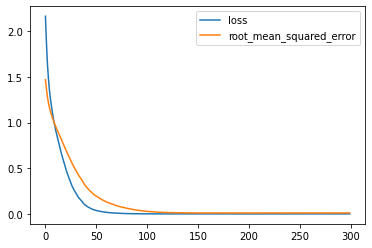

In [28]:
model_losses.plot()

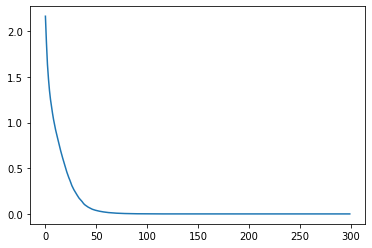

In [29]:
plt.plot(model.history.history['loss'])
plt.show()

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [31]:
Y_pred = model.predict(X_test)

2/2 [==============================] - 0s 0s/step


In [32]:
Y_pred

array([[1.0747882],
       [1.0628915],
       [1.065529 ],
       [1.0755947],
       [1.0634418],
       [1.0383278],
       [1.0797459],
       [1.0346625],
       [1.070295 ],
       [1.064308 ],
       [1.0575178],
       [1.0705178],
       [1.0502943],
       [1.0519022],
       [1.0714986],
       [1.0159367],
       [1.0688455],
       [1.0383165],
       [1.06472  ],
       [1.0531566],
       [1.0104579],
       [1.0505013],
       [1.0562136],
       [1.0861338],
       [1.0550141],
       [1.0859962],
       [1.086233 ],
       [1.0387818],
       [1.0532486],
       [1.0577372],
       [1.0651984],
       [1.0527922],
       [1.0837712],
       [1.0325642],
       [1.0439032],
       [1.0425824],
       [1.0618225],
       [1.0681465],
       [1.0912871],
       [1.0131917],
       [1.0445219],
       [1.0586762],
       [1.053785 ],
       [1.0512666],
       [1.0456429],
       [1.0734783],
       [1.0825564],
       [1.0322238],
       [1.0413386]], dtype=float32)

In [33]:
Y_test

25     1.0911
6      1.0549
159    1.0477
217    1.0819
247    1.0736
207    1.0254
198    1.0841
156    1.0287
9      1.0722
119    1.0575
50     1.0756
216    1.0678
235    1.0563
178    1.0477
88     1.0800
168    1.0180
240    1.0599
16     1.0333
71     1.0788
133    1.0398
35     1.0101
20     1.0551
114    1.0384
32     1.0719
192    1.0624
171    1.0983
10     1.0830
78     1.0498
99     1.0484
162    1.0690
117    1.0671
224    1.0740
26     1.0811
65     1.0313
19     1.0610
132    1.0452
102    1.0530
203    1.0854
143    1.0775
249    1.0328
80     1.0283
123    1.0623
118    1.0404
17     1.0468
202    1.0340
72     1.0796
175    1.0763
43     1.0269
250    1.0399
Name: Density, dtype: float64

In [34]:
print(Y_pred.shape)
print(Y_test.shape)

(49, 1)
(49,)


In [35]:
print(type(Y_pred))
print(type(Y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [36]:
my_prediction=model.predict([[26,37.4,37.3,22.8,32.4,29.4,18.2,24.880784,0.848723,1.683860]])
print(my_prediction)

1/1 [==============================] - 0s 93ms/step
[[0.65593225]]


In [37]:
#pip install tf-nightly-2.0-preview

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tf-nightly-2.0-preview
ERROR: No matching distribution found for tf-nightly-2.0-preview


In [38]:
model.save('BMI_model.h5')
model.save_weights('BMI_model_weights.h5')

In [39]:
BMI_model=tf.keras.models.load_model('BMI_model.h5')

In [40]:
converter = tf.lite.TFLiteConverter.from_keras_model(BMI_model)

In [41]:
# converter.target_spec.supported_ops = [
#   tf.lite.OpsSet.TFLITE_BUILTINS, # enable TensorFlow Lite ops.
#   tf.lite.OpsSet.SELECT_TF_OPS # enable TensorFlow ops.
# ]
tflite_model=converter.convert()
open('BMI_model.tflite', 'wb').write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\TUKUNA\AppData\Local\Temp\tmpbqd6n20d\assets


1788